## In-class hands-on activity: Logistic Regression

Part 1: Logistic regression using simulated data

Part 2: Heart Failure Prediction
Original dataset from <https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data>

In-class exercise: Fitting logistic regression and compute performance. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

%matplotlib inline

pd.set_option('display.max_column', 500)
pd.set_option('display.max_rows', 5000)
random.seed(1001)
np.random.seed(1001)

### Part 1: Simulated Data for two variable case

In [2]:
# Class 1 centered at (1, 1), class 0 centered at (-1, -1)
#    Std dev for two features are 2.5, 2.2

# number of class 1 data points
n1 = 20
# number of class 0 data points
n0 = 20

mean1 = np.array([1, 1])
cov1 = np.array([[2.5, 0.3],
                [0.3, 2.2]])

mean0 = np.array([-1, -1])
cov0 = np.array([[2.5, 0.3],
                [0.3, 2.2]])

# generate class1
train1 = np.random.multivariate_normal(mean1, cov1, n1)
# generate class0
train0 = np.random.multivariate_normal(mean0, cov0, n0)

# combine the two class
train = np.vstack((train1, train0))
df_train = pd.DataFrame.from_records(train)
df_train.columns = ("x1", "x2")
# assign the label
df_train['label'] = 1
df_train.iloc[n1:, 2] = 0

<Axes: xlabel='x1', ylabel='x2'>

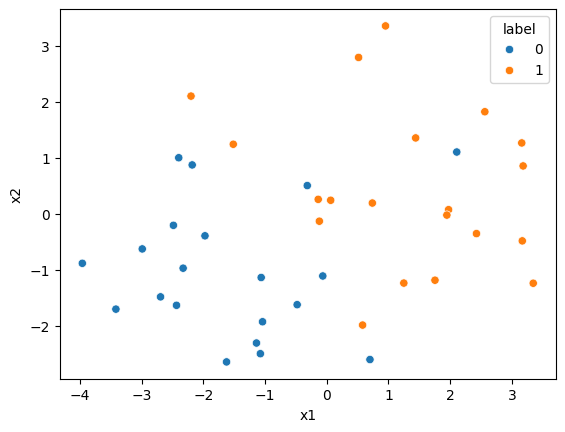

In [3]:
sns.scatterplot(data=df_train, x="x1", y="x2", hue="label")

### TODO
Use `linear_model.LogisticRegression` to fit a ridge Logistic regression. The regularization coefficient is set to `C=1000`. Store the fitted model in `clf0`. Print the coefficients and Intercept. 

In [4]:
clf0 = linear_model.LogisticRegression(C=1000)
clf0.fit(train,df_train.label.values)
print(f"Coefficient: {clf0.coef_}")
print(f" Intercept: {clf0.intercept_}")

clf0.decision_function

Coefficient: [[1.21182284 1.02067065]]
 Intercept: [0.63376563]


<bound method LinearClassifierMixin.decision_function of LogisticRegression(C=1000)>

### Sanity Check
<pre>
Coefficient: [[1.21182284 1.02067065]]
 Intercept: [0.63376563]    
</pre>


====

Visualize the predicted probability based on the fitted model. 
We are generating grids in a [-5, 5] X [-5, 5] space and compute the fitted probability for each data point. 

In [5]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
prob0 = clf0.predict_proba(grid)[:, 1]
probs = prob0.reshape(xx.shape)

### Plot the probability.

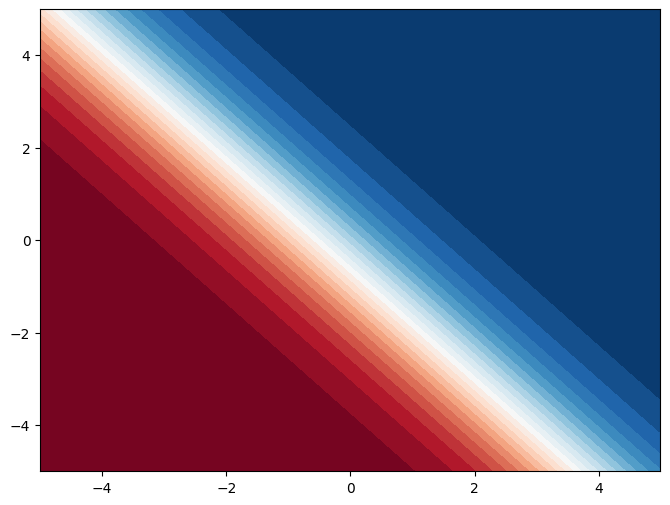

In [6]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)

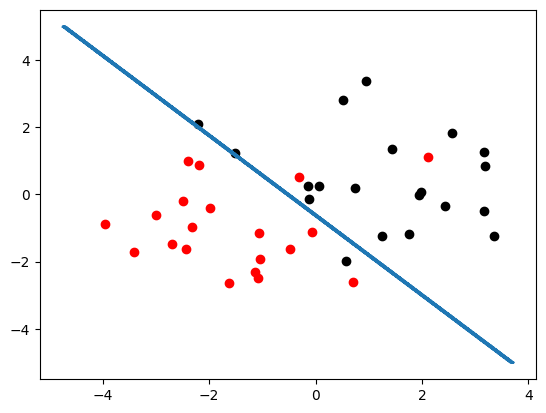

In [7]:
# a simple way to identify the classification boundary
idx = np.abs(prob0 - 0.5) < 0.01
subgrid = grid[idx]
plt.plot(subgrid[:,0], subgrid[:,1])

# plot the data points and color them.
plt.scatter(train1[:,0], train1[:,1], color = "black")
plt.scatter(train0[:,0], train0[:,1], color = "red")

###  Part 2: 資料說明 (From the original data provider)

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Attribute Information
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]


In [8]:
# Start with data loading and showing sample data
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
# make sure the data types are reasonable
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [10]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [11]:
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_wc=pd.get_dummies(df,columns=cat_cols, drop_first=False)
df_wc.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [12]:
# split training and test

mask1 = np.random.rand(len(df_wc)) < 0.9
df_wc_train = df_wc[mask1].copy()
df_wc_test = df_wc[~mask1].copy()

target = 'HeartDisease'
featnames = df_wc.columns.to_list()
featnames.remove(target)

print("Features to be include in the model", featnames)

Features to be include in the model ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


In [13]:



X_train = df_wc_train[featnames].values
y_train = df_wc_train[target].values

X_test = df_wc_test[featnames].values
y_test = df_wc_test[target].values

mm_scaler=preprocessing.MinMaxScaler()
X_train=mm_scaler.fit_transform(X_train)
X_test=mm_scaler.transform(X_test)



### TODO

* What will happen to binary features and numerical features after applying MinMaxScalar()?
* Verify that X_train and X_test has been properly scaled.

In [14]:
print(f"The shape of X_train is {X_train.shape}")
xmin1 = X_train.min(axis=0)
xmax1 = X_train.max(axis=0)
xmean1 = X_train.mean(axis=0)

xmmm1 = np.vstack((xmin1, xmax1, xmean1))
print("The min, max, and mean for X_train")
print(xmmm1.T)
                  

print(f"The shape of X_test is {X_test.shape}")
xmin2 = X_test.min(axis=0)
xmax2 = X_test.max(axis=0)
xmean2 = X_test.mean(axis=0)

xmmm2 = np.vstack((xmin2, xmax2, xmean2))
print("The min, max, and mean for X_test")
print(xmmm2.T)

The shape of X_train is (850, 20)
The min, max, and mean for X_train
[[0.         1.         0.52184874]
 [0.         1.         0.66214118]
 [0.         1.         0.33056873]
 [0.         1.         0.22470588]
 [0.         1.         0.54098592]
 [0.         1.         0.38170279]
 [0.         1.         0.20823529]
 [0.         1.         0.79176471]
 [0.         1.         0.53529412]
 [0.         1.         0.18941176]
 [0.         1.         0.22705882]
 [0.         1.         0.04823529]
 [0.         1.         0.20588235]
 [0.         1.         0.6       ]
 [0.         1.         0.19411765]
 [0.         1.         0.59647059]
 [0.         1.         0.40352941]
 [0.         1.         0.07294118]
 [0.         1.         0.48941176]
 [0.         1.         0.43764706]]
The shape of X_test is (68, 20)
The min, max, and mean for X_test
[[ 0.06122449  0.89795918  0.50540216]
 [ 0.5         0.925       0.66      ]
 [ 0.          0.85903814  0.31862745]
 [ 0.          1.          

### --- remove below ---
### Discussion for this TODO

We can see that for X_test, the minimal and maximum values for each features may not be exactly 0 and 1. This is reasonable because the unseen data in the test set may have a slightly different data range. However, given that we have split training and test randomly, and the dataset size is large enough, we should see the data range in the test set lie closely to 0 and 1. 

### --- remove above ---

### Fitting Logistic Regression

Use linear_model.LogisticRegressionCV() to fit a logistic regression model to the training data. Use metrics.classification_report() to compute prediction performance. Answer the following questions. 

1. List first five coefficients and their feature names.
2. Interpret the meanings of these feature coefficients.
3. Show the regularization coefficient selected by the CV routine.
4. Apply the model to predict the test set. What is the accuracy, precision, and recall?

In [15]:
clf=linear_model.LogisticRegressionCV()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


print("First five features and coefficients")
for coef, fname in zip(clf.coef_.flatten(), featnames[0:5]):
    print(f"{fname:12s}: {coef:.4f}")

print("---")
print(f"The regularization coefficient is {clf.C_[0]:.4f}")

print("---")
print(metrics.classification_report(y_test, y_pred, digits=4))

First five features and coefficients
Age         : 0.2918
RestingBP   : 0.0336
Cholesterol : -0.3425
FastingBS   : 0.5922
MaxHR       : -0.2533
---
The regularization coefficient is 0.0464
---
              precision    recall  f1-score   support

           0     0.8000    0.6667    0.7273        24
           1     0.8333    0.9091    0.8696        44

    accuracy                         0.8235        68
   macro avg     0.8167    0.7879    0.7984        68
weighted avg     0.8216    0.8235    0.8193        68



accuracy = 0.8286

for the positive cases, precision = 0.8136, recall = 0.8727, F1 = 0.8421.

### Sanity Check
<pre>
First five features and coefficients
Age         : 0.2918
RestingBP   : 0.0336
Cholesterol : -0.3425
FastingBS   : 0.5922
MaxHR       : -0.2533
---
The regularization coefficient is 0.0464
---
              precision    recall  f1-score   support

           0     0.8000    0.6667    0.7273        24
           1     0.8333    0.9091    0.8696        44

    accuracy                         0.8235        68
   macro avg     0.8167    0.7879    0.7984        68
weighted avg     0.8216    0.8235    0.8193        68
    
</pre>


<pre>
accuracy = 0.8286

for the positive cases, precision = 0.8136, recall = 0.8727, F1 = 0.8421.    
</pre>

### Compute Accuracy, Precision, Recall, and F1 from scratch.
Use numpy to do the work. You should not use existing library such as metrics.classification_report(). 

In [16]:
acc = np.sum(y_test == y_pred) / y_test.shape[0]
print(f"Accuracy = {acc:.4f}")

# recall
npositive = np.sum(y_test)
recall = np.sum(y_test * y_pred) / npositive
print(f"Recall = {recall:.4f}")

# precision
npredp = np.sum(y_pred)
precision = np.sum(y_test * y_pred) / npredp
print(f"Precision = {precision:.4f}")

# F1
f1 = 2 * precision * recall / (precision + recall)
print(f"F1 score = {f1:.4f}")

Accuracy = 0.8235
Recall = 0.9091
Precision = 0.8333
F1 score = 0.8696


### Sanity Check
<pre>
Accuracy = 0.8235
Recall = 0.9091
Precision = 0.8333
F1 score = 0.8696    
</pre>

### Explore the prediction results

Create a new data frame that contain the following columns (in this order):
* Pred: the predicted value for test examples
* Predp: the predicted probability for test examples.
* HearDisease: the ground truth for the test examples.
* All the remaining features.

Go through the prediction errors. Think about the following questions. 
1. Why the model made wrong predictions for certain examples?
2. How can we improve the performance?



In [17]:
y_predprob = clf.predict_proba(X_test)
df_wc_test['Pred'] = y_pred
df_wc_test['Predp'] = y_predprob[:,1]
df_wc_test['Perror'] = 0
df_wc_test.loc[df_wc_test.Pred != df_wc_test.HeartDisease, 'Perror'] = 1


origcol = list(df_wc_test.columns)

headcol = ['Perror', 'Pred', 'Predp', 'HeartDisease']
for aitem in headcol:
    origcol.remove(aitem)
newcol = headcol + origcol

df_wc_test2 = df_wc_test[newcol]

df_wc_test2.sort_values(['Predp'], ascending=True)

,Perror,Pred,Predp,HeartDisease,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
126,0,0,0.053963,0,34,130,161,0,190,0.0,True,False,False,True,False,False,False,True,False,True,False,False,False,True
9,0,0,0.061381,0,48,120,284,0,120,0.0,True,False,False,True,False,False,False,True,False,True,False,False,False,True
64,0,0,0.062089,0,50,110,202,0,145,0.0,True,False,False,True,False,False,False,True,False,True,False,False,False,True
234,0,0,0.070592,0,54,140,309,0,140,0.0,True,False,False,True,False,False,False,False,True,True,False,False,False,True
467,0,0,0.076663,0,63,132,0,0,130,0.1,True,False,False,True,False,False,False,True,False,True,False,False,False,True
228,0,0,0.119271,0,41,120,295,0,170,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
162,0,0,0.125006,0,47,160,263,0,174,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
12,0,0,0.128423,0,39,120,204,0,145,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
171,0,0,0.131500,0,40,140,235,0,188,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True
684,1,0,0.142854,1,47,108,243,0,152,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True
